## Import Software Libraries

In [1]:
#Read System Parameters
import sys

#Multidimensional arrays
import numpy as np

#Manipulation and Analyze Data
import pandas as pd

#Advance Mathematical Functions
import scipy as sp
from scipy import stats

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Features Engineerng and Machine Learning Algorithm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Encode Data and SUppress Warnings
import category_encoders as ce
import warnings

#Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- Numpy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Scipy {}'.format(sp.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Searborn {}'.format(sns.__version__))
print('- Scikit-Learn {}'.format(sklearn.__version__))
print('- Category Encoders {}'.format(ce.__version__))



Libraries used in this project:
- Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
- Numpy 1.23.2
- Pandas 1.1.3
- Scipy 1.5.2
- Matplotlib 3.3.2
- Searborn 0.11.2
- Scikit-Learn 1.1.1
- Category Encoders 2.3.0


## Load and preview the data

In [2]:
user_data = pd.read_pickle('users_data_cleaned.pickle')
user_data.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


## Check the shape of the data

In [3]:
user_data.shape

(45209, 19)

## Check the number of unique users

In [4]:
len(np.unique(user_data.user_id))

45209

## Check the data types

In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [6]:
user_data.columns.to_series().groupby(user_data.dtypes).groups

{bool: ['default', 'housing', 'loan', 'term_deposit'], int64: ['age', 'duration', 'campaign', 'pdays', 'previous'], float64: ['number_transactions', 'total_amount_usd'], datetime64[ns]: ['date_joined'], object: ['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']}

## Check for correlations

In [7]:
user_data.corr().abs()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,0.163409,0.008813,0.138838,0.030429,0.075319,0.017220,0.026431,0.030751,0.023046,0.053390
total_amount_usd,0.163409,1.000000,0.095839,0.065390,0.066857,0.084526,0.022586,0.017274,0.006435,0.016952,0.050785
age,0.008813,0.095839,1.000000,0.017875,0.185552,0.015641,0.004645,0.004767,0.023745,0.001297,0.025168
default,0.138838,0.065390,0.017875,1.000000,0.006020,0.077232,0.010017,0.016819,0.029982,0.018331,0.022421
housing,0.030429,0.066857,0.185552,0.006020,1.000000,0.041341,0.005041,0.023583,0.124197,0.037087,0.139161
loan,0.075319,0.084526,0.015641,0.077232,0.041341,1.000000,0.012395,0.009972,0.022762,0.011048,0.068193
duration,0.017220,0.022586,0.004645,0.010017,0.005041,0.012395,1.000000,0.084551,0.001549,0.001213,0.394549
campaign,0.026431,0.017274,0.004767,0.016819,0.023583,0.009972,0.084551,1.000000,0.088636,0.032860,0.073179
pdays,0.030751,0.006435,0.023745,0.029982,0.124197,0.022762,0.001549,0.088636,1.000000,0.454817,0.103616
previous,0.023046,0.016952,0.001297,0.018331,0.037087,0.011048,0.001213,0.032860,0.454817,1.000000,0.093232


## Generate summary statistics for all of the data

In [8]:
user_data.describe(datetime_is_numeric=True, include='all')

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
count,45209,35210.000000,35210.000000,45209.000000,44921,45209,43352,45209,45209,45209,32191,45209.000000,45209.000000,45209.000000,45209.000000,8252,45209,45179,45115
unique,45209,NaN,NaN,NaN,11,3,3,2,2,2,2,NaN,NaN,NaN,NaN,3,2,NaN,3
top,ffe6d0f4-15f2-4f22-820d-9eed96b2489e,NaN,NaN,NaN,blue-collar,married,secondary,False,True,False,cellular,NaN,NaN,NaN,NaN,failure,False,NaN,mobile
freq,1,NaN,NaN,NaN,9731,27212,23202,44394,25128,37965,29285,NaN,NaN,NaN,NaN,4901,39920,NaN,27504
mean,NaN,3.977052,1369.417751,40.935853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.153067,2.763897,40.199651,0.580349,NaN,NaN,1999-06-14 21:54:38.558619008,NaN
min,NaN,1.000000,-8019.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN,1988-01-01 00:00:00,NaN
25%,NaN,2.000000,73.000000,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN,1993-09-18 00:00:00,NaN
50%,NaN,3.000000,451.000000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN,1999-06-11 00:00:00,NaN
75%,NaN,4.000000,1438.000000,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN,2005-03-18 00:00:00,NaN
max,NaN,20.000000,102127.000000,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4918.000000,63.000000,871.000000,275.000000,NaN,NaN,2010-11-30 00:00:00,NaN


## Generate summary statistics for numerical data only

In [9]:
user_data.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


## Generate modal values for all data

In [10]:
#Drop user ID since it's unique
user_data.drop(['user_id'], axis=1).mode()

,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,2.0,0.0,32.0,blue-collar,married,secondary,False,True,False,cellular,124.0,1.0,-1.0,0.0,failure,False,1990-07-05,mobile
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-12-07,NaN


## Generate skewness and kurtosis measurements

In [11]:
user_data.skew()

number_transactions     2.704543
total_amount_usd        8.596128
age                     0.684861
default                 7.245206
housing                -0.224686
loan                    1.852545
duration                3.144556
campaign                4.898555
pdays                   2.615635
previous               41.845672
term_deposit            2.383403
dtype: float64

In [12]:
user_data.kurt()

number_transactions       6.659034
total_amount_usd        150.790967
age                       0.319760
default                  50.495241
housing                  -1.949602
loan                      1.431987
duration                 18.155941
campaign                 39.248145
pdays                     6.934713
previous               4506.684640
term_deposit              3.680770
dtype: float64

## Plot histograms for all numerical columns

In [13]:
user_data_for_hist = \
user_data.select_dtypes(exclude=['bool'])

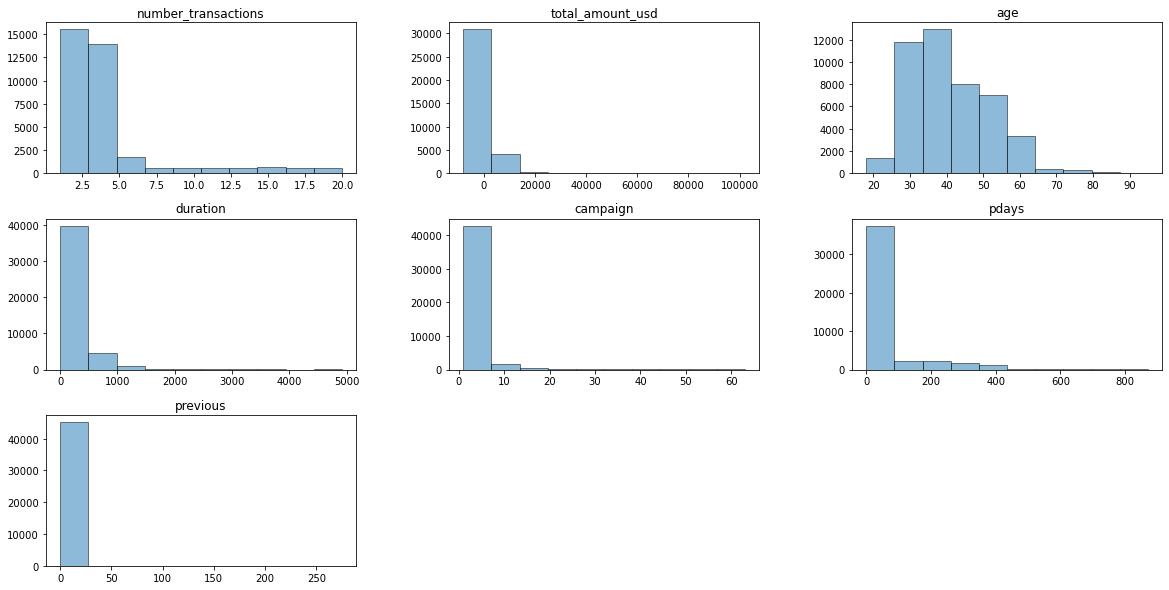

In [14]:
user_data_for_hist.hist(figsize = (20,10), alpha = 0.5,
                  edgecolor ='black', grid= False);

## Generate a box plot for age

In [15]:
user_data['age'].describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

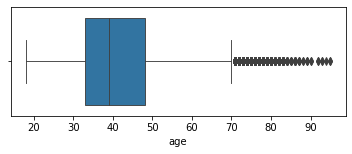

In [16]:
plt.figure(figsize=(6,2))
sns.boxplot(x=user_data['age'], linewidth=0.9);

## Generate a violin plot for age

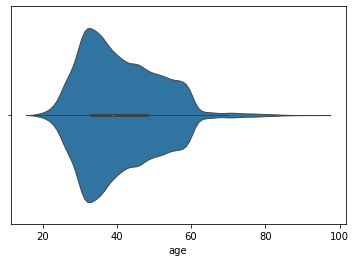

In [17]:
sns.violinplot(x = user_data['age'], linewidth=0.9);

## Generate a box plot for number_transaction

In [18]:
user_data['number_transactions'].describe()

count    35210.000000
mean         3.977052
std          3.814329
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         20.000000
Name: number_transactions, dtype: float64

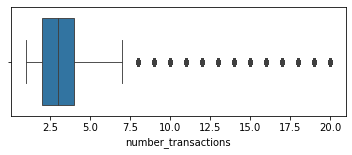

In [19]:
plt.figure(figsize=(6,2))
sns.boxplot(x=user_data['number_transactions'], linewidth=0.9);

## Generate a violin plot for number_transaction

<AxesSubplot:xlabel='number_transactions'>

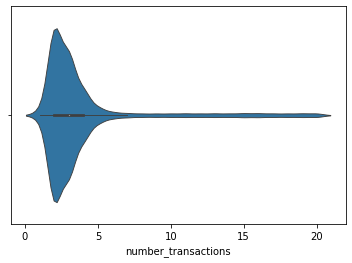

In [20]:
sns.violinplot(x = user_data['number_transactions'], linewidth=0.9)

## Generate a line plot for total_amount_usd

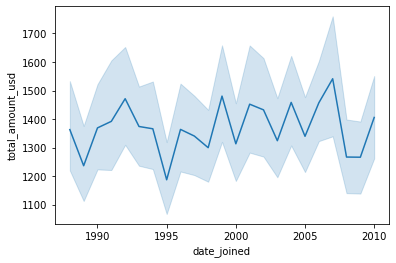

In [21]:
years = user_data['date_joined'].dt.year

sns.lineplot(data= user_data, x=years,
            y='total_amount_usd', estimator=np.mean);

## Generate scatter plots comparing total_amount_usd to number_transaction

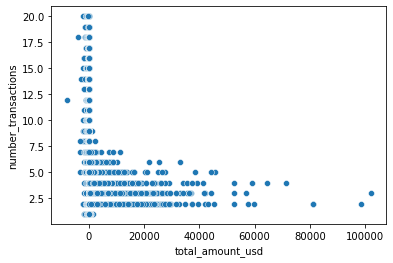

In [22]:
sns.scatterplot(data =user_data, x='total_amount_usd',
               y='number_transactions');

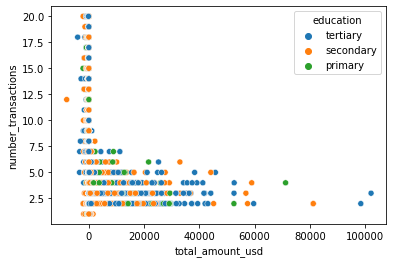

In [23]:
sns.scatterplot(data =user_data, x='total_amount_usd',
               y='number_transactions', hue='education');

## Generate bar charts for job

In [24]:
user_job_dist = user_data['job'].value_counts(dropna=False)

user_job_dist

blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: job, dtype: int64

Text(0, 0.5, 'jumlah')

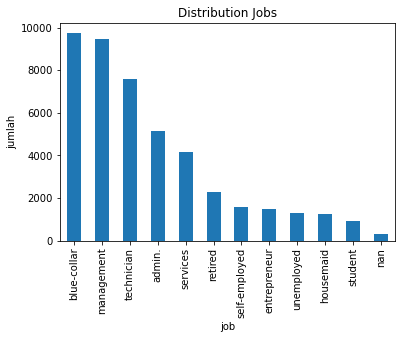

In [25]:
#Vertical bar chart
user_job_dist.plot(kind='bar')
plt.title('Distribution Jobs');
plt.xlabel("job")
plt.ylabel("jumlah")

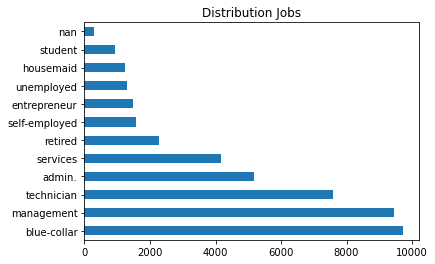

In [26]:
# Horizontal bar chart
user_job_dist.plot(kind='barh')
plt.title('Distribution Jobs');

<AxesSubplot:>

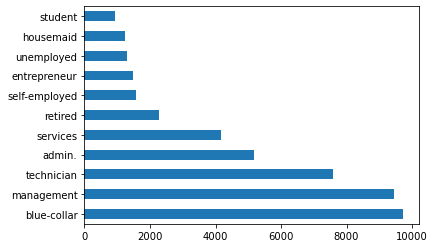

In [27]:
#Exclude missing values
user_data['job'].value_counts().plot(kind='barh')

## Generate a bar chart for marital

In [28]:
user_marital_dist = \
user_data['marital'].value_counts(dropna=False)

user_marital_dist

married     27212
single      12790
divorced     5207
Name: marital, dtype: int64

married     27212
single      12790
divorced     5207
Name: marital, dtype: int64

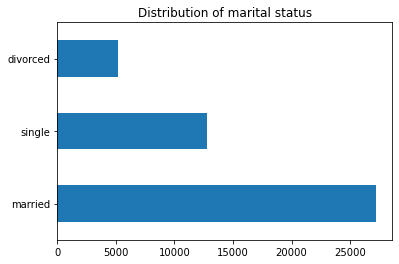

In [29]:
user_marital_dist.plot(kind='barh')
plt.title('Distribution of marital status')
user_marital_dist

## Generate a bar chart for education

In [30]:
user_education_dist = \
user_data['education'].value_counts(dropna=False)

user_education_dist

secondary    23202
tertiary     13300
primary       6850
NaN           1857
Name: education, dtype: int64

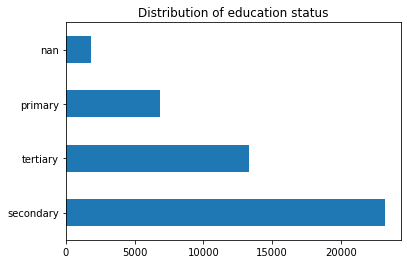

In [31]:
user_education_dist.plot(kind='barh')
plt.title('Distribution of education status');


## Generate a bar chart for contact

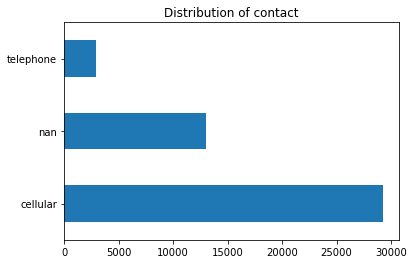

In [32]:
user_contact_dist = \
user_data['contact'].value_counts(dropna=False)

user_contact_dist.plot(kind='barh')
plt.title('Distribution of contact');

## Generate a bar chart for poutcome

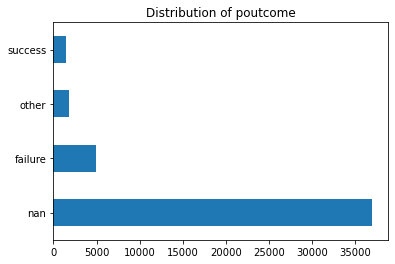

In [33]:
user_poutcome_dist = \
user_data['poutcome'].value_counts(dropna=False)

user_poutcome_dist.plot(kind='barh')
plt.title('Distribution of poutcome');

## Generate a bar chart for default

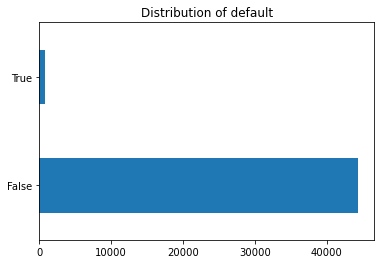

In [34]:
user_default_dist = \
user_data['default'].value_counts(dropna=False)

user_default_dist.plot(kind='barh')
plt.title('Distribution of default');

## Generate a bar chart for device

In [35]:
user_device_dist = \
user_data['device'].value_counts(dropna=False)

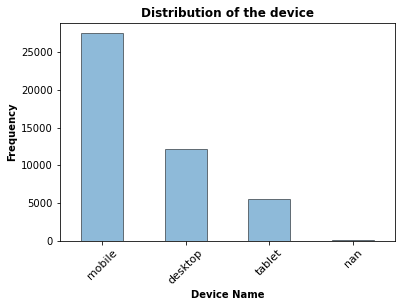

In [36]:
user_device_dist.plot(kind='bar',
                     alpha=0.5, edgecolor = 'black')
plt.title('Distribution of the device', size=12, weight='bold')
plt.xticks(rotation = 45, size=11)
plt.xlabel('Device Name', size=10, weight ='bold')
plt.ylabel('Frequency', size=10, weight ='bold')
plt.show()

## Generate a heatmap for the feature correlations

In [37]:
corr_matrix = user_data.corr()
corr_matrix

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.163409,-0.008813,0.138838,0.030429,0.075319,-0.017220,0.026431,-0.030751,-0.023046,-0.053390
total_amount_usd,-0.163409,1.000000,0.095839,-0.065390,-0.066857,-0.084526,0.022586,-0.017274,0.006435,0.016952,0.050785
age,-0.008813,0.095839,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.138838,-0.065390,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.030429,-0.066857,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.075319,-0.084526,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.017220,0.022586,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.026431,-0.017274,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.030751,0.006435,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.023046,0.016952,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


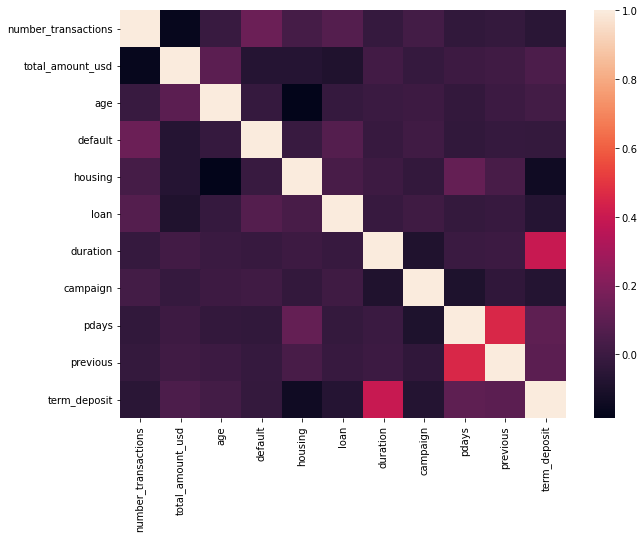

In [38]:
fig = plt.figure(figsize=(10, 7.5))
sns.heatmap(corr_matrix);

## Format the heatmap to make it easier to read

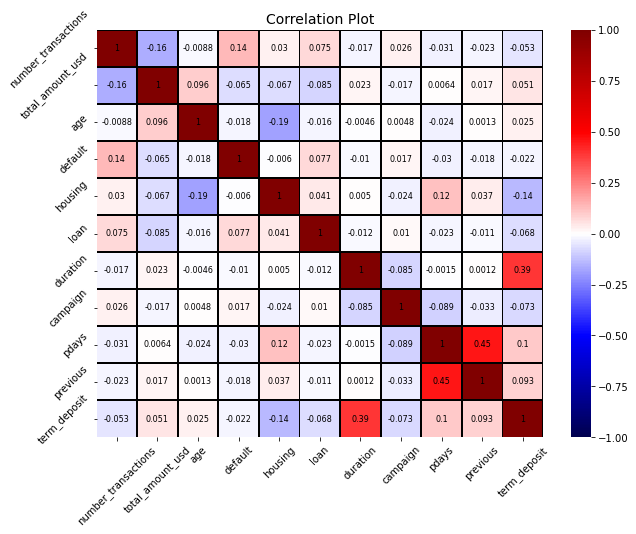

In [39]:
fig = plt.figure(figsize=(10, 7.5))

sns.heatmap(corr_matrix,
           cmap='seismic',
           linewidths=0.75,
           linecolor='black',
           cbar=True,
           vmin=-1,
           vmax=1,
           annot=True,
           annot_kws={'size':8, 'color':'black'})
plt.tick_params(labelsize=10, rotation = 45)
plt.title('Correlation Plot', size = 14);

## Identify Missing Values

In [40]:
user_data.isnull().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

## Identify the percentage of missing values for each feature

In [41]:
percent_missing = user_data.isnull().mean() 

percent_missing

user_id                0.000000
number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
date_joined            0.000664
device                 0.002079
dtype: float64

## Generate a missing value report

In [42]:
def missing_value_pct_df(data):
    """Create a DataFrame to summarize missing values."""
  
    percent_missing = data.isnull().mean() 
    missing_value_df = pd.DataFrame(percent_missing).reset_index()
    
    missing_value_df = missing_value_df.rename(columns = {'index': 'column_name',
                                       0: 'percent_missing'})

    # Multiply by 100 and round to 2 decimal places.
    missing_value_df['percent_missing'] = missing_value_df['percent_missing'].apply(lambda x: round(x * 100, 2)) 

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'],ascending = False)

    return missing_value_df

In [43]:
missing_value_df = missing_value_pct_df(user_data)

missing_value_df

,column_name,percent_missing
15,poutcome,81.75
10,contact,28.80
2,total_amount_usd,22.12
1,number_transactions,22.12
6,education,4.11
4,job,0.64
18,device,0.21
17,date_joined,0.07
12,campaign,0.00
16,term_deposit,0.00


## Remove features with a high percentage of missing values

In [44]:
# Threshold above which to drop feature.

threshold = 80

cols_to_drop = list(missing_value_df[missing_value_df['percent_missing'] \
                      > threshold]['column_name'])

print('Number of features to drop:',
      missing_value_df[missing_value_df['percent_missing'] > threshold].shape[0])

print(f'Features with missing values greater than {threshold}%:',cols_to_drop)

Number of features to drop: 1
Features with missing values greater than 80%: ['poutcome']


In [45]:
user_data_cleaned = user_data.drop(cols_to_drop, axis = 1)

In [46]:
# Confirm feature was dropped.

missing_value_df = missing_value_pct_df(user_data_cleaned)

missing_columns = list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])

print('Number of features with missing values:',len(missing_columns))

Number of features with missing values: 7


## Identify numerical data with missing values

In [47]:
dtypes = ['int64', 'float64']

numerical_columns = list(user_data_cleaned.select_dtypes(dtypes).columns)

print('Numerical features with missing values:',
      list(set(numerical_columns).intersection(missing_columns)))

Numerical features with missing values: ['number_transactions', 'total_amount_usd']


## Impute missing data values for total_amount_usd

In [48]:
# Find a sample user with missing value

sample_user = user_data_cleaned[user_data_cleaned['total_amount_usd']. \
                   isnull()].sample(1).user_id

sample_user

39281    d2b32000-7791-4433-a453-7b20c44b944a
Name: user_id, dtype: object

In [49]:
# Print mean of total_amount_usd.

print('Mean total_amount_usd:',round(user_data_cleaned['total_amount_usd'].mean(), 2))

# Impute missing values for total_amount_usd with mean.

user_data_cleaned['total_amount_usd'].fillna(round(user_data_cleaned['total_amount_usd'].mean(), 2), 
       inplace = True)

Mean total_amount_usd: 1369.42


In [50]:
user_data_cleaned[user_data_cleaned.user_id.isin(sample_user)]['total_amount_usd']

39281    1369.42
Name: total_amount_usd, dtype: float64

## Replace missing values for number_transactions with 0

In [51]:
user_data_cleaned['number_transactions'].fillna(0, inplace = True)

In [52]:
user_data_cleaned[user_data_cleaned.user_id.isin(sample_user)]['number_transactions']

39281    0.0
Name: number_transactions, dtype: float64

## Identify categorical data with missing values

In [53]:
categorical_columns = list(user_data_cleaned.select_dtypes(['object']).columns)

print('Categorical features with missing values:',
      list(set(categorical_columns).intersection(missing_columns)))

Categorical features with missing values: ['device', 'education', 'job', 'contact']


## Replace categorical missing values with 'Unknown'

In [54]:
user_data_cleaned.device.fillna('Unknown', inplace = True)
user_data_cleaned.education.fillna('Unknown', inplace = True)
user_data_cleaned.contact.fillna('Unknown', inplace = True)
user_data_cleaned.job.fillna('Unknown', inplace = True)

In [55]:
user_data_cleaned.device.value_counts()

mobile     27504
desktop    12112
tablet      5499
Unknown       94
Name: device, dtype: int64

## Check if there are any other missing values

In [56]:
missing_value_df = missing_value_pct_df(user_data_cleaned)
missing_columns = list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])

print('Number of features with missing values:', len(missing_columns))
print('Features with missing values:', missing_columns)

Number of features with missing values: 1
Features with missing values: ['date_joined']


## Remove all rows where date_joined is missing

In [57]:
print('Number of users with corrupted data:',
      user_data_cleaned[user_data_cleaned['date_joined']. \
                         isnull()].shape[0])

Number of users with corrupted data: 30


In [59]:
# Remove corrupted data.

users_data_cleaned = \
user_data_cleaned[~user_data_cleaned['date_joined'].isnull()]

In [60]:
# Check to see if any corrupted rows remain.

print('Number of users with corrupted data:',
      user_data_cleaned[user_data_cleaned['date_joined']. \
                         isnull()].shape[0])

Number of users with corrupted data: 30


## Perform one last check for missing values

In [61]:
missing_value_df = missing_value_pct_df(user_data_cleaned)
missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])

print('Number of features with missing values:',
      len(missing_columns))

Number of features with missing values: 1


## View the distribution of age

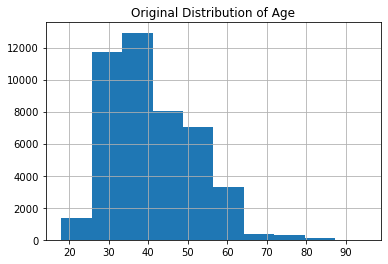

In [62]:
user_data_cleaned['age'].hist()
plt.title('Original Distribution of Age');

## Apply a log transformation to age

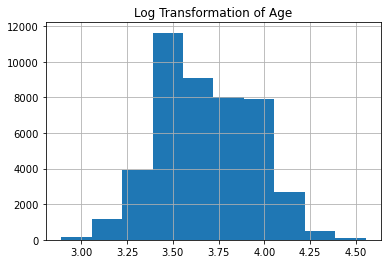

In [63]:
np.log(user_data_cleaned['age']).hist()
plt.title('Log Transformation of Age');

## Apply a Box–Cox transformation to age

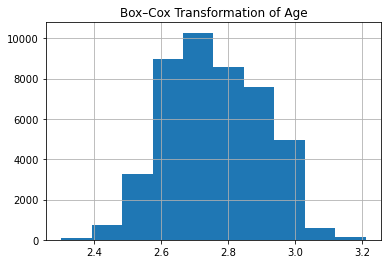

In [64]:
pd.Series(stats.boxcox(user_data_cleaned['age'])[0]).hist()
plt.title('Box–Cox Transformation of Age');

## Identify categorical features

In [65]:
categorical_columns = \
list(user_data_cleaned.select_dtypes(['object']).columns)

print('The number of categorical features:',
      len(categorical_columns))
print('The names of categorical features:',
      categorical_columns)

The number of categorical features: 6
The names of categorical features: ['user_id', 'job', 'marital', 'education', 'contact', 'device']


## One-hot encode job

In [66]:
user_data_cleaned.job.value_counts(dropna = True)

blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Unknown           288
Name: job, dtype: int64

In [67]:
# Create object for one-hot encoding.

encoder = ce.OneHotEncoder(cols = 'job',
                           return_df = True,
                           use_cat_names = True)

In [68]:
# Fit and transform data.

user_data_encoded = encoder.fit_transform(user_data_cleaned)

# Preview the data.

user_data_encoded.head()

,user_id,number_transactions,total_amount_usd,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_Unknown,job_retired,...,housing,loan,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,1,0,0,0,0,0,...,True,False,Unknown,261,1,-1,0,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,0,1,0,0,0,0,...,True,False,Unknown,151,1,-1,0,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,0,0,1,0,0,0,...,True,True,Unknown,76,1,-1,0,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,0,0,0,1,0,0,...,True,False,Unknown,92,1,-1,0,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,0,0,0,0,1,0,...,False,False,Unknown,198,1,-1,0,False,1995-08-01,mobile


In [69]:
list(user_data_encoded)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device']

In [70]:
print('Shape of data before encoding:',
      user_data_cleaned.shape)
print('Shape of data after encoding:',
      user_data_encoded.shape)

Shape of data before encoding: (45209, 18)
Shape of data after encoding: (45209, 29)


## Dummy encode marital

In [71]:
marital_encoded = \
pd.get_dummies(data = user_data_encoded['marital'],
               drop_first = True)

marital_encoded 

,married,single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
45211,1,0
45212,0,0
45213,1,0
45214,1,0


In [72]:
# Concatenate the new encoded columns.

user_data_encoded = \
pd.concat([user_data_encoded, marital_encoded], axis = 1)

# Drop the original variable.

user_data_encoded.drop(['marital'], axis = 1, inplace = True)

# Preview the data

user_data_encoded.head()

,user_id,number_transactions,total_amount_usd,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_Unknown,job_retired,...,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device,married,single
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,1,0,0,0,0,0,...,Unknown,261,1,-1,0,False,1998-08-23,mobile,1,0
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,0,1,0,0,0,0,...,Unknown,151,1,-1,0,False,2008-07-15,desktop,0,1
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,0,0,1,0,0,0,...,Unknown,76,1,-1,0,False,2002-06-04,mobile,1,0
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,0,0,0,1,0,0,...,Unknown,92,1,-1,0,False,1995-06-29,tablet,1,0
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,0,0,0,0,1,0,...,Unknown,198,1,-1,0,False,1995-08-01,mobile,0,1


In [73]:
print('Shape of data after encoding:',
      user_data_encoded.shape)

list(user_data_encoded)

Shape of data after encoding: (45209, 30)


['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device',
 'married',
 'single']

## One-hot encode the remaining categorical variables

In [74]:
cols = ['education', 'contact', 'device']

encoder = ce.OneHotEncoder(cols = cols,
                           return_df = True,
                           use_cat_names = True)

In [75]:
# Fit and transform data.

user_data_encoded = encoder.fit_transform(user_data_encoded)

# Preview the data.

user_data_encoded.head()

,user_id,number_transactions,total_amount_usd,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_Unknown,job_retired,...,pdays,previous,term_deposit,date_joined,device_mobile,device_desktop,device_tablet,device_Unknown,married,single
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,1,0,0,0,0,0,...,-1,0,False,1998-08-23,1,0,0,0,1,0
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,0,1,0,0,0,0,...,-1,0,False,2008-07-15,0,1,0,0,0,1
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,0,0,1,0,0,0,...,-1,0,False,2002-06-04,1,0,0,0,1,0
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,0,0,0,1,0,0,...,-1,0,False,1995-06-29,0,0,1,0,1,0
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,0,0,0,0,1,0,...,-1,0,False,1995-08-01,1,0,0,0,0,1


In [76]:
print('Shape of data after encoding:',
      user_data_encoded.shape)

list(user_data_encoded)

Shape of data after encoding: (45209, 38)


['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'device_Unknown',
 'married',
 'single']

## Discretize age into bins

In [77]:
user_data_encoded.age.describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [78]:
# Define age bins and labels.

bins = [18, 25, 35, 45, 55, 65, 75, 110]
labels = ['18–24', '25–34', '35–44',
          '45–54', '55–64', '65–74', '75+']

# Perform binning using bin list.

user_data_encoded['age_group'] = \
pd.cut(user_data_encoded['age'], bins = bins,
       labels = labels, right = False)

# Map bins to integer values.
user_data_encoded['age_group_encoded'] =user_data_encoded['age_group'].cat.codes

In [79]:
# Verify correct binning.

age_vars = ['age_group_encoded', 'age_group', 'age']

user_data_encoded[age_vars].sample(10)

,age_group_encoded,age_group,age
2620,2,35–44,44
44055,5,65–74,74
1309,1,25–34,32
6835,1,25–34,31
41266,0,18–24,23
5557,1,25–34,32
30115,1,25–34,31
29703,4,55–64,55
40106,1,25–34,27
30976,1,25–34,30


## Plot the new distribution of age

In [80]:
user_age_dist = user_data_encoded.age_group.value_counts()

user_age_dist

35–44    14533
25–34    14204
45–54     9958
55–64     4895
18–24      809
65–74      510
75+        300
Name: age_group, dtype: int64

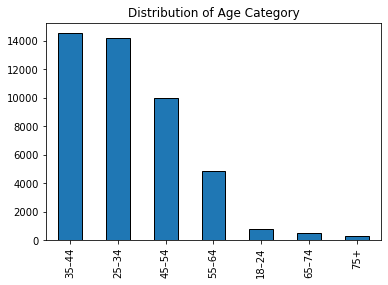

In [81]:
user_age_dist.plot(kind = 'bar', edgecolor = 'black')
plt.title('Distribution of Age Category');

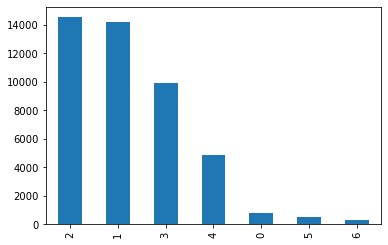

In [82]:
# Check against encoded values.

user_data_encoded.age_group_encoded. \
value_counts().plot(kind = 'bar');

## Drop the age and age_group variables

In [83]:
user_data_encoded.drop(['age', 'age_group'],
                        axis = 1, inplace = True)

list(user_data_encoded)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'device_Unknown',
 'married',
 'single',
 'age_group_encoded']

## Create a month_joined variable from date_joined

In [84]:
user_data_encoded['month_joined'] = \
user_data_encoded.date_joined.dt.month

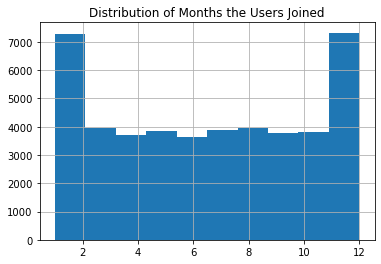

In [85]:
# View the distribution of data.

user_data_encoded['month_joined'].hist()
plt.title('Distribution of Months the Users Joined');

In [86]:
user_data_encoded.drop(['date_joined'],
                        axis = 1, inplace = True)

list(user_data_encoded)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'device_Unknown',
 'married',
 'single',
 'age_group_encoded',
 'month_joined']

## Remove features with low variance

In [87]:
user_data_encoded.std()

number_transactions       3.749104
total_amount_usd       2703.489610
job_management            0.406731
job_technician            0.373908
job_entrepreneur          0.178355
job_blue-collar           0.410997
job_Unknown               0.079561
job_retired               0.218109
job_admin.                0.318276
job_services              0.288866
job_self-employed         0.183596
job_unemployed            0.167307
job_housemaid             0.163329
job_student               0.142541
education_tertiary        0.455682
education_secondary       0.499831
education_Unknown         0.198468
education_primary         0.358558
default                   0.133052
housing                   0.496880
loan                      0.366827
contact_Unknown           0.452813
contact_cellular          0.477671
contact_telephone         0.245252
duration                257.525446
campaign                  3.098076
pdays                   100.130586
previous                  2.303489
term_deposit        

In [88]:
# Define standard deviation threshold.

threshold = 0.1

# Identify features below threshold.

cols_to_drop = \
list(user_data_encoded.std()[user_data_encoded.std() \
                              < threshold].index.values)

print('Features with low standard deviation:',
      cols_to_drop)

Features with low standard deviation: ['job_Unknown', 'device_Unknown']


In [89]:
# Drop features below threshold.

user_data_interim = user_data_encoded.drop(cols_to_drop,
                                             axis = 1)

list(user_data_interim)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'married',
 'single',
 'age_group_encoded',
 'month_joined']

## Drop highly correlated features

In [90]:
# Define correlation threshold.

threshold = 0.75

corr_matrix = user_data_encoded.corr().abs()
high_corr_var = np.where(corr_matrix >= threshold)
high_corr_var = [(corr_matrix.index[x],
                  corr_matrix.columns[y],
                  round(corr_matrix.iloc[x, y], 2))
                  for x, y in zip(*high_corr_var)
                  if x != y and x < y]


high_corr_var

[('contact_Unknown', 'contact_cellular', 0.86),
 ('device_mobile', 'device_desktop', 0.75),
 ('married', 'single', 0.77)]

In [91]:
# Tidy up the output.

record_collinear = pd.DataFrame(high_corr_var). \
rename(columns = {0: 'drop_feature',
                  1: 'corr_feature',
                  2: 'corr_values'})

record_collinear = record_collinear. \
sort_values(by = 'corr_values', ascending = False)

record_collinear = record_collinear.reset_index(drop = True)

record_collinear 

,drop_feature,corr_feature,corr_values
0,contact_Unknown,contact_cellular,0.86
1,married,single,0.77
2,device_mobile,device_desktop,0.75


In [92]:
cols_to_drop = list(record_collinear['drop_feature'])
print(cols_to_drop)

['contact_Unknown', 'married', 'device_mobile']


In [93]:
user_data_final = user_data_interim.drop(cols_to_drop,
                                           axis = 1)

list(user_data_final)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device_desktop',
 'device_tablet',
 'single',
 'age_group_encoded',
 'month_joined']

## Filter by demographics data

In [94]:
user_data_demographics = \
user_data_final.filter(regex = 'education|job|age|single')

user_data_demographics.head(n = 3)

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


## Standardize the demographics data

In [95]:
user_data_demographics.describe()

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
count,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,0.209184,0.168042,0.032892,0.215245,0.050079,0.114380,0.091884,0.034927,0.028822,0.027428,0.020748,0.294189,0.513216,0.041076,0.151519,0.282908,2.147227
std,0.406731,0.373908,0.178355,0.410997,0.218109,0.318276,0.288866,0.183596,0.167307,0.163329,0.142541,0.455682,0.499831,0.198468,0.358558,0.450417,1.106880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [96]:
scaler = StandardScaler()
        
scaler.fit(user_data_demographics)
user_data_scaled = scaler.transform(user_data_demographics)

print('New standard deviation: ', user_data_scaled.std())
print('New mean:               ', round(user_data_scaled.mean()))

New standard deviation:  1.0
New mean:                0


## Perform PCA to reduce the dimensionality of the demographics dataset

In [97]:
pca = PCA(n_components = 2, random_state = 1)

pca.fit(user_data_scaled)

reduced = pca.transform(user_data_scaled)

In [98]:
reduced_df = pd.DataFrame(reduced, columns = ['PCA1', 'PCA2'])

reduced_df

,PCA1,PCA2
0,2.558399,1.078420
1,-0.821599,-1.749748
2,-0.576800,-0.551069
3,-0.540260,1.592285
4,0.385494,-0.616517
...,...,...
45204,1.160728,0.073598
45205,-0.657989,4.371487
45206,-1.326069,2.368755
45207,-1.574882,1.041223


## Load the final dataset

In [99]:
user_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45209 non-null  object 
 1   number_transactions  45209 non-null  float64
 2   total_amount_usd     45209 non-null  float64
 3   job_management       45209 non-null  int64  
 4   job_technician       45209 non-null  int64  
 5   job_entrepreneur     45209 non-null  int64  
 6   job_blue-collar      45209 non-null  int64  
 7   job_retired          45209 non-null  int64  
 8   job_admin.           45209 non-null  int64  
 9   job_services         45209 non-null  int64  
 10  job_self-employed    45209 non-null  int64  
 11  job_unemployed       45209 non-null  int64  
 12  job_housemaid        45209 non-null  int64  
 13  job_student          45209 non-null  int64  
 14  education_tertiary   45209 non-null  int64  
 15  education_secondary  45209 non-null 

In [100]:
user_data_final.to_pickle('user_data_final.pickle')

## Load the demographics dataset with PCA applied

In [101]:
reduced_df.to_pickle('user_data_demo_pca.pickle')